In [1]:
!pip install tensorflow-gpu==2.0rc

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

5

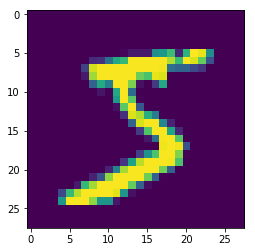

In [5]:
plt.imshow(X_train[0])
y_train[0]

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
input_shape = X_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,128,10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.2377 - accuracy: 0.9273 - val_loss: 0.0504 - val_accuracy: 0.9827
Epoch 2/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0829 - accuracy: 0.9755 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 3/10
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0276 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0278 - val_accuracy: 0.9898
Epoch 7/10
60000/60000 [==========================

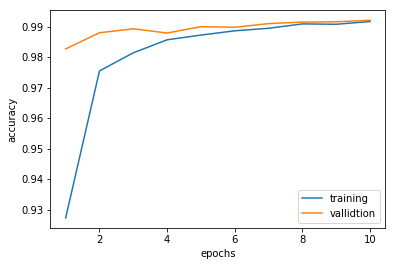

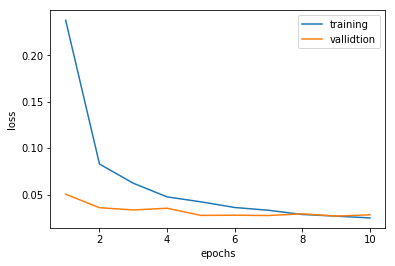

In [18]:
er = range(1,11)
plt.plot(er,history.history['accuracy'])
plt.plot(er,history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel("epochs")
plt.legend(labels = ['training','vallidtion'])
plt.show()
plt.plot(er,history.history['loss'])
plt.plot(er,history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel("epochs")
plt.legend(labels = ['training','vallidtion'])
plt.show()

In [19]:
!pip install mlxtend

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
conf = confusion_matrix(y_test,y_pred)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb04d439898>)

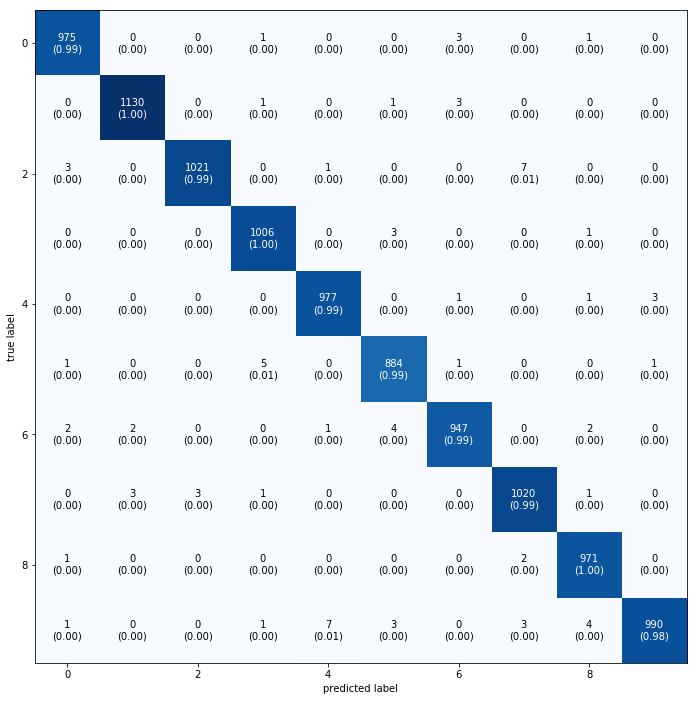

In [29]:
plot_confusion_matrix(conf,figsize=(12,12),show_normed=True)